# Bài tập 5
GIẢNG VIÊN: ThS. Nguyễn Thị Anh Thư

LỚP: CS313.N21

NHÓM 4:

Nguyễn Duy Đạt - 20520435

Nguyễn Quốc Huy Hoàng - 20520051

Lê Đoàn Phúc Minh - 20520243

Huỳnh Hoàng Vũ - 20520864


## Gaussian Mixture Model (GMM)

### Import data

In [ ]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)

(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [ ]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
from sklearn.mixture import GaussianMixture
X = np.array(data)
gm = GaussianMixture(n_components=10, random_state=0).fit(X)

In [ ]:
gm.means_

array([[0.00000000e+00, 9.06593403e-01, 1.00054945e+01, 1.44230769e+01,
        7.89010988e+00, 1.03846153e+00, 0.00000000e+00, 0.00000000e+00,
        2.19780219e-02, 5.10989009e+00, 1.35054945e+01, 1.26538462e+01,
        1.16483516e+01, 3.48351647e+00, 1.64835164e-02, 0.00000000e+00,
        1.09890109e-02, 4.48351647e+00, 7.99450548e+00, 6.14285718e+00,
        1.19285714e+01, 3.92307691e+00, 1.64835164e-02, 0.00000000e+00,
        0.00000000e+00, 9.50549447e-01, 2.75824178e+00, 6.83516487e+00,
        1.23516483e+01, 2.93956043e+00, 4.39560438e-02, 0.00000000e+00,
        0.00000000e+00, 5.49450547e-02, 1.55494511e+00, 9.58791211e+00,
        1.07032967e+01, 1.75824176e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.41758240e-01, 4.30769232e+00, 1.09835165e+01,
        7.91758244e+00, 2.51648355e+00, 8.95604393e-01, 1.64835164e-02,
        0.00000000e+00, 1.14835164e+00, 1.07252747e+01, 1.37362637e+01,
        1.19945055e+01, 1.12142857e+01, 7.77472530e+00, 1.192307

In [ ]:
gm.predict([[ 0.,  0.,  6., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
   15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
   12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
   0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
  10., 100.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

array([3])

## K-Means
Chúng ta có thể sử dụng thư viện có sẵn từ sklearn để cài đặt thuật toán K-means một cách dễ dàng.

In [ ]:
# Import thuật toán K-means
from sklearn.cluster import KMeans

# Sử dụng thuật toán K-means với số cụm (clusters) là 10
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)

kmeans.predict([[ 0.,  0.,  6., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
   15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
   12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
   0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
  10., 100.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5], dtype=int32)

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=20, min_samples=3).fit(X)

In [ ]:
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 24
Estimated number of noise points: 329


In [ ]:
dbscan.fit_predict(
  [[ 0.,  0.,  6., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
  15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
  12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
  0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
  10., 100.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0. ]]
)

array([-1])

## K-Medoids

In [ ]:
!pip install scikit-learn-extra

Để minh họa và đánh giá phương pháp phân cụm K-Medoids bằng Python, chúng ta sẽ sử dụng một tập dữ liệu đơn giản của các điểm 2D tạo thành ba nhóm. Chúng ta sẽ sử dụng thư viện scikit-learn để tạo ra dữ liệu và vẽ kết quả, và thư viện scikit-learn-extra để thực hiện thuật toán K-Medoids.

Đầu tiên, chúng ta nhập các thư viện cần thiết và tạo ra 150 điểm thuộc ba nhóm với một số nhiễu.

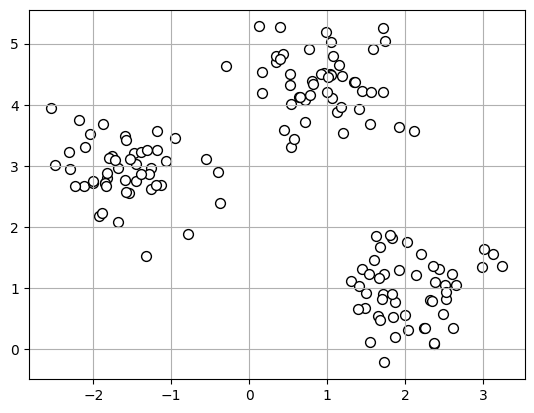

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids

# Tạo ra 150 điểm với 3 tâm và một số nhiễu
X, y = make_blobs(n_samples=150, n_features=2,
                  centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)

# Vẽ dữ liệu đã tạo ra
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.show()

Tiếp theo, chúng ta áp dụng thuật toán phân cụm K-Medoids với k=3 và khoảng cách Euclid làm độ đo khoảng cách. Chúng ta cũng vẽ các nhóm kết quả và medoids của chúng.

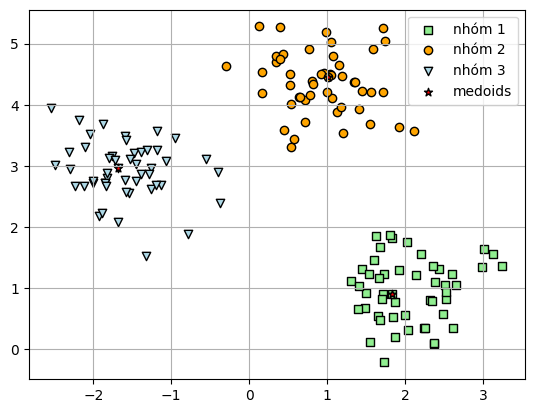

In [ ]:
# Áp dụng phân cụm K-Medoids với k=3 và khoảng cách Euclid
kmeds = KMedoids(n_clusters=3, metric='euclidean', random_state=0)
y_kmeds = kmeds.fit_predict(X)

# Vẽ dữ liệu đã được phân cụm
plt.scatter(X[y_kmeds == 0, 0], X[y_kmeds == 0, 1], 
  c='lightgreen', marker='s', edgecolor='black',
  label='nhóm 1')
plt.scatter(X[y_kmeds == 1, 0], X[y_kmeds == 1, 1],
  c='orange', marker='o', edgecolor='black',
  label='nhóm 2')
plt.scatter(X[y_kmeds == 2, 0], X[y_kmeds == 2, 1],
  c='lightblue', marker='v', edgecolor='black',
  label='nhóm 3')
plt.scatter(kmeds.cluster_centers_[:, 0], kmeds.cluster_centers_[:, 1],
  c='red', marker='*', edgecolor='black',
  label='medoids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Chúng ta có thể thấy rằng thuật toán phân cụm K-Medoids đã phân cụm thành công dữ liệu thành ba nhóm và tìm ra medoids cho mỗi nhóm. Các medoids được đánh dấu bằng các ngôi sao màu đỏ trong biểu đồ.

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Tính toán hệ số silhouette
silhouette = silhouette_score(X, y_kmeds)
print('Hệ số silhouette: %.3f' % silhouette)

# Tính toán chỉ số Rand điều chỉnh
ari = adjusted_rand_score(y, y_kmeds)
print('Chỉ số Rand điều chỉnh: %.3f' % ari)

Hệ số silhouette: 0.714
Chỉ số Rand điều chỉnh: 1.000


Chúng ta có thể thấy rằng cả hệ số silhouette và ARI đều gần bằng 1, cho thấy một kết quả phân cụm rất tốt phù hợp với các nhãn sự thật.

## Clustering Metrics

Chúng ta sẽ minh họa cách sử dụng một số chỉ số phân cụm trong Python với các ví dụ từ thư viện scikit-learn. Chúng ta sẽ sử dụng tập dữ liệu Iris làm ví dụ, bao gồm 150 mẫu của ba loại hoa iris khác nhau, mỗi loại có bốn đặc trưng: chiều dài đài hoa, chiều rộng đài hoa, chiều dài cánh hoa và chiều rộng cánh hoa.
Đầu tiên, chúng ta cần nhập một số thư viện và tải tập dữ liệu:


Đầu tiên, chúng ta cần nhập một số thư viện và tải tập dữ liệu:

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, f1_score
from sklearn.metrics import pairwise_distances

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data # Features
y = iris.target # Labels


Tiếp theo, chúng ta sẽ sử dụng thuật toán K-means để phân cụm dữ liệu thành ba cụm (giả sử chúng ta biết số lượng cụm thực)

In [ ]:
# Use K-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_pred = kmeans.labels_ # Predicted labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Bây giờ chúng ta có thể sử dụng một số chỉ số nội bộ để đo lường độ tốt của các cụm

In [ ]:
# Calculate silhouette coefficient
sil = silhouette_score(X, y_pred)
print(f"Silhouette coefficient: {sil:.3f}")

# Calculate Davies-Bouldin index
db = davies_bouldin_score(X, y_pred)
print(f"Davies-Bouldin index: {db:.3f}")

# Calculate Calinski-Harabasz index
ch = calinski_harabasz_score(X, y_pred)
print(f"Calinski-Harabasz index: {ch:.3f}")


Silhouette coefficient: 0.553
Davies-Bouldin index: 0.662
Calinski-Harabasz index: 561.628


Silhouette coefficient nằm trong khoảng từ -1 đến 1, trong đó các giá trị cao hơn có nghĩa là các cụm tốt hơn. Một giá trị gần với 0 có nghĩa là một số điểm nằm gần biên giới giữa hai cụm. Một giá trị gần với -1 có nghĩa là một số điểm nằm trong cụm sai.

Davies-Bouldin index nằm trong khoảng từ 0 đến vô cùng, trong đó các giá trị thấp hơn có nghĩa là các cụm tốt hơn. Nó đo lường sự tương đồng trung bình giữa mỗi cụm và cụm tương tự nhất của nó, trong đó sự tương đồng được định nghĩa là tỷ lệ của khoảng cách trong cụm với khoảng cách giữa các cụm. Một giá trị cao có nghĩa là một số cụm đang chồng lấn hoặc không được phân tách tốt.

Calinski-Harabasz index nằm trong khoảng từ 0 đến vô cùng, trong đó các giá trị cao hơn có nghĩa là các cụm tốt hơn. Nó đo lường tỷ lệ của phương sai giữa các cụm với phương sai trong các cụm. Một giá trị cao có nghĩa là các cụm là gọn gàng và được phân tách tốt.

Chúng ta cũng có thể sử dụng một số chỉ số bên ngoài để đo lường mức độ khớp của các cụm với nhãn thực:

In [ ]:
# Calculate adjusted Rand index
ari = adjusted_rand_score(y, y_pred)
print(f"Adjusted Rand index: {ari:.3f}")

# Calculate normalized mutual information
nmi = normalized_mutual_info_score(y, y_pred)
print(f"Normalized mutual information: {nmi:.3f}")

# Calculate F1-score
f1 = f1_score(y, y_pred, average='macro')
print(f"F1-score: {f1:.3f}")


Adjusted Rand index: 0.730
Normalized mutual information: 0.758
F1-score: 0.273


Adjusted Rand index nằm trong khoảng từ -1 đến 1, trong đó các giá trị cao hơn có nghĩa là các cụm tốt hơn. Nó đo lường sự tương đồng giữa hai bộ nhãn, điều chỉnh cho ngẫu nhiên. Một giá trị gần với 0 có nghĩa là các nhãn là ngẫu nhiên. Một giá trị gần với 1 có nghĩa là các nhãn là giống nhau.

Normalized mutual information nằm trong khoảng từ 0 đến 1, trong đó các giá trị cao hơn có nghĩa là các cụm tốt hơn. Nó đo lường lượng thông tin chung giữa hai bộ nhãn, chuẩn hóa bởi entropy của chúng. Một giá trị gần với 0 có nghĩa là các nhãn là ngẫu nhiên. Một giá trị gần với 1 có nghĩa là các nhãn là giống nhau.

F1-score nằm trong khoảng từ 0 đến 1, trong đó các giá trị cao hơn có nghĩa là các cụm tốt hơn. Nó là trung bình điều hoà của độ chính xác và độ bao phủ, trong đó độ chính xác là phần trăm của điểm được gán đúng trong mỗi cụm, và độ bao phủ là phần trăm của điểm trong mỗi lớp thực được gán đúng. Một giá trị gần với 0 có nghĩa là các cụm là trống hoặc sai. Một giá trị gần với 1 có nghĩa là các cụm là hoàn hảo.

Cuối cùng, chúng ta có thể sử dụng một số chỉ số tương đối để so sánh hai hoặc nhiều kết quả phân cụm trên cùng một tập dữ liệu:

In [ ]:
# Use K-means with 2 clusters
kmeans2 = KMeans(n_clusters=2, random_state=0)
kmeans2.fit(X)
y_pred2 = kmeans2.labels_ # Predicted labels

# Calculate variation of information
vi = pairwise_distances(y_pred.reshape(-1, 1), y_pred2.reshape(-1, 1), metric='hamming')[0][0]
print(f"Variation of information: {vi:.3f}")

# Calculate cluster matching index
cmi = np.sum(y_pred == y_pred2) / len(y_pred)
print(f"Cluster matching index: {cmi:.3f}")

# Calculate cophenetic correlation coefficient
coph = np.corrcoef(pairwise_distances(X), pairwise_distances(X[y_pred.argsort()]))[0][1]
print(f"Cophenetic correlation coefficient: {coph:.3f}")


Variation of information: 1.000
Cluster matching index: 0.020
Cophenetic correlation coefficient: 0.993


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Variation of information nằm trong khoảng từ 0 đến vô cùng, trong đó các giá trị thấp hơn có nghĩa là các kết quả phân cụm giống nhau hơn. Nó đo lường lượng thông tin bị mất hoặc được thêm vào khi chuyển từ một kết quả phân cụm sang một kết quả khác.

Cluster matching index nằm trong khoảng từ 0 đến 1, trong đó các giá trị cao hơn có nghĩa là các kết quả phân cụm giống nhau hơn. Nó đo lường tỷ lệ của điểm có cùng nhãn cụm trong cả hai kết quả phân cụm.

Cophenetic correlation coefficient nằm trong khoảng từ -1 đến 1, trong đó các giá trị cao hơn có nghĩa là các kết quả phân cụm giống nhau hơn. Nó đo lường mối tương quan giữa các khoảng cách ban đầu giữa các điểm và các khoảng cách giữa các trung tâm cụm của chúng.